The value of $\pi$ can be computed using the following formula:
$$
    \sum_{n=1}^{\infty} \frac{1}{n^2} = \frac{\pi^2}{6}
$$

In [48]:
import math
import matplotlib.pyplot as plt

In [47]:
def compute_pi_euler(max_n):
    return math.sqrt(6.0*sum(map(lambda n: 1/n**2, range(1, max_n + 1))))

In [43]:
for max_n in range(1, 200_000, 10_000):
    print(compute_pi_euler(max_n))

2.449489742783178
3.141497173494886
3.1415449103248125
3.141560824031404
3.1415687811528423
3.141573555511514
3.141576738453049
3.14157901200023
3.141580717170193
3.141582043419173
3.1415831044219322
3.1415839725174632
3.141584695932031
3.1415853080532035
3.1415858327293367
3.1415862874492806
3.1415866853297105
3.141587036401049
3.1415873484647534
3.1415876276798795


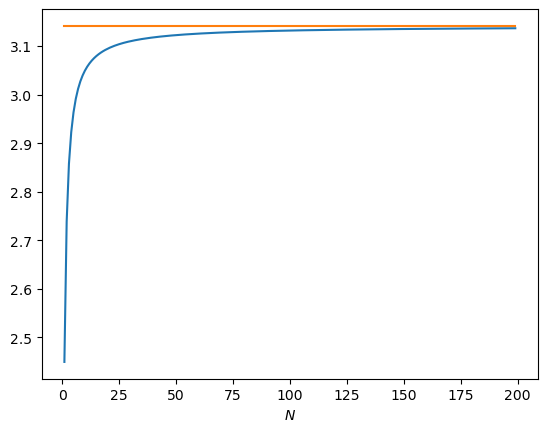

In [58]:
n_values = list(range(1, 200))
plt.plot(n_values, [compute_pi_euler(n) for n in n_values], label=r'$\pi$')
plt.plot(n_values, [math.pi for _ in n_values],
         label=r'$\sqrt{6 \sum_{n=1}^N \frac{1}{n^2}}$')
plt.xlabel(r'$N$');

In [52]:
def assess_accuracy(func, max_order):
    for order in range(1, max_order + 1):
        n = 10**order
        print(f'10^{order:02d} -> {abs(math.pi - func(n))/math.pi:.4e}')

In [45]:
assess_accuracy(compute_pi_euler, 9)

10^01 2.9358e-02
10^02 3.0291e-03
10^03 3.0386e-04
10^04 3.0395e-05
10^05 3.0396e-06
10^06 3.0396e-07
10^07 3.0397e-08
10^08 2.7398e-09
10^09 2.7398e-09


Note that the accuracy doesn't increase beyond $10^8$.  This is due to round-off errors introduced by adding very small values after large values.  This can be remedied by reversing the order in which the terms are added.

In [42]:
def compute_pi_euler_down(max_n):
    return math.sqrt(6.0*sum(map(lambda n: 1/n**2, range(max_n, 0, -1))))

In [46]:
assess_accuracy(compute_pi_euler_down, 9)

10^01 2.9358e-02
10^02 3.0291e-03
10^03 3.0386e-04
10^04 3.0395e-05
10^05 3.0396e-06
10^06 3.0396e-07
10^07 3.0396e-08
10^08 3.0396e-09
10^09 3.0396e-10


It is clear that this indeed improves accuracy.